In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.



#### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

#### Theoretical

<BarContainer object of 12 artists>

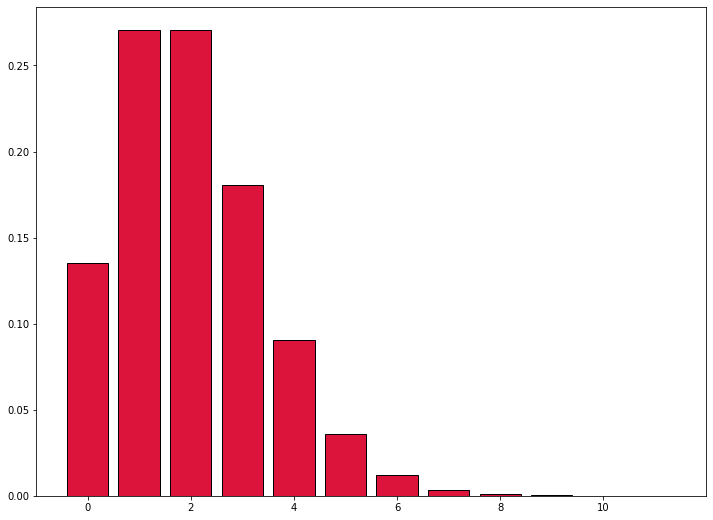

In [52]:
plt.figure(figsize=(12, 9))
x = np.arange(0,12)
y = stats.poisson(2).pmf(x)
plt.bar(x, y, ec='black', fc='crimson')

In [12]:
# What is the probability that no cars drive up in the noon hour?
# use .pmf because this is a discrete variable and you want the probability of one distinct value
stats.poisson(2).pmf(0)

0.1353352832366127

In [ ]:
# What is the probability that 3 or more cars come through the drive through?


In [18]:
stats.poisson(2).sf(2)

0.32332358381693654

In [19]:
# How likely is it that the drive through gets at least 1 car?
stats.poisson(2).sf(0)

0.8646647167633873

In [33]:
cars_in_line = np.random.poisson(2, size = 10_000)
cars_in_line

array([0, 0, 0, ..., 2, 3, 0])

In [42]:
carsdf = pd.DataFrame(cars_in_line)
carsdf['exactly_zero'] = carsdf[0] == 0
carsdf

,0,exactly_zero
0,0,True
1,0,True
2,0,True
3,4,False
4,1,False
...,...,...
9995,1,False
9996,3,False
9997,2,False
9998,3,False


In [43]:
carsdf['exactly_zero'].mean()

0.1388

In [45]:
carsdf['three_or_more'] = carsdf[0] >= 3
carsdf

,0,exactly_zero,three_or_more
0,0,True,False
1,0,True,False
2,0,True,False
3,4,False,True
4,1,False,False
...,...,...,...
9995,1,False,False
9996,3,False,True
9997,2,False,False
9998,3,False,True


In [46]:
carsdf['three_or_more'].mean()

0.3208

In [47]:
carsdf['at_least_1'] = carsdf[0] >= 1
carsdf

,0,exactly_zero,three_or_more,at_least_1
0,0,True,False,False
1,0,True,False,False
2,0,True,False,False
3,4,False,True,True
4,1,False,False,True
...,...,...,...,...
9995,1,False,False,True
9996,3,False,True,True
9997,2,False,False,True
9998,3,False,True,True


In [48]:
carsdf['at_least_1'].mean()

0.8612

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. -Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this       scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [55]:
gpa = stats.norm(3.0, 0.3)
gpa

(array([1.000e+00, 7.000e+00, 1.300e+01, 2.300e+01, 5.000e+01, 1.130e+02,
        1.730e+02, 2.700e+02, 4.390e+02, 5.820e+02, 7.670e+02, 9.610e+02,
        1.017e+03, 1.084e+03, 1.020e+03, 9.260e+02, 7.600e+02, 5.950e+02,
        4.750e+02, 3.050e+02, 1.950e+02, 1.090e+02, 5.300e+01, 3.700e+01,
        1.400e+01, 4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([1.90020698, 1.98092402, 2.06164105, 2.14235809, 2.22307512,
        2.30379216, 2.38450919, 2.46522623, 2.54594326, 2.6266603 ,
        2.70737733, 2.78809437, 2.8688114 , 2.94952844, 3.03024547,
        3.11096251, 3.19167954, 3.27239658, 3.35311361, 3.43383065,
        3.51454768, 3.59526472, 3.67598175, 3.75669879, 3.83741582,
        3.91813286, 3.99884989, 4.07956693, 4.16028396, 4.241001  ,
        4.32171803]),
 <a list of 30 Patch objects>)

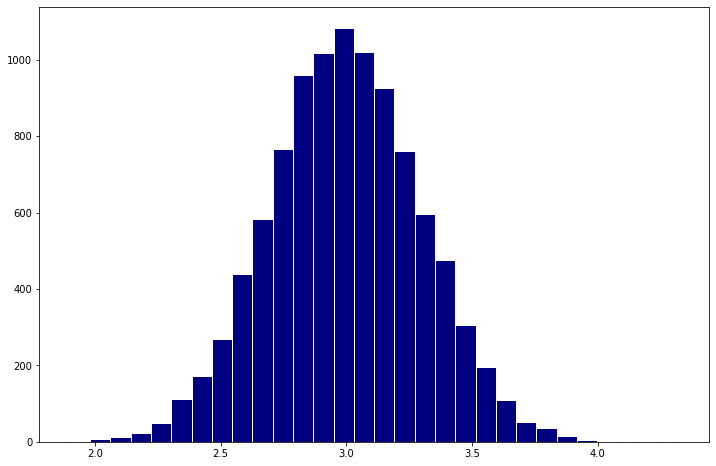

In [60]:
plt.figure(figsize=(12, 8))
plt.hist(gpa.rvs(10_000), bins=30, fc='navy', ec='white')

In [63]:
# What grade point average is required to be in the top 5% of the graduating class?
gpa.isf(.05)

3.4934560880854417

In [64]:
# What GPA constitutes the bottom 15% of the class?
gpa.ppf(0.15)

2.689069983151863

In [65]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# -Determine the range of the third decile. 
#Would a student with a 2.8 grade point average qualify for this scholarship?

In [67]:
gpa.ppf(0.30)
# A student with 2.8 gpa would qualify

2.842679846187588

In [71]:
# If I have a GPA of 3.5, what percentile am I in?
gpa.cdf(3.5)

0.9522096477271853

In [95]:
GPA = np.random.normal(3.0, 0.3, size = 10_000)
GPArounded = np.around(GPA , 2)
GPArounded

array([2.57, 2.69, 2.87, ..., 3.29, 3.05, 3.04])

In [98]:
top_5_percent = np.percentile(GPA, 95).round()
top_5_percent_rounded = np.around(top_5_percent, 2)
top_5_percent_rounded

3.0

In [99]:
GPAdf = pd.DataFrame({'student_gpa':GPArounded, 'top_5_percent': top_5_percent_rounded})
GPAdf


,student_gpa,top_5_percent
0,2.57,3.0
1,2.69,3.0
2,2.87,3.0
3,3.67,3.0
4,3.70,3.0
...,...,...
9995,3.29,3.0
9996,3.10,3.0
9997,3.29,3.0
9998,3.05,3.0


In [108]:
GPAdf['is_top_5_percent'] = (GPAdf['student_gpa'] >= GPAdf['top_5_percent'])
# (height['Average Womens Height'] > height['Average Mens Height'])

In [109]:
GPAdf

,student_gpa,top_5_percent,is_top_5_percent
0,2.57,3.0,False
1,2.69,3.0,False
2,2.87,3.0,False
3,3.67,3.0,True
4,3.70,3.0,True
...,...,...,...
9995,3.29,3.0,True
9996,3.10,3.0,True
9997,3.29,3.0,True
9998,3.05,3.0,True
